In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2
from scipy.stats import shapiro, kstest, chi2_contingency, f_oneway
import statistics
import tese_func
import heapq
import math
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle
#from matplotlib_venn import venn3_unweighted
from sklearn.datasets import load_breast_cancer
#sns.set_palette("pastel", desat=0.8)

leg_size=16
title_size=16
axis_size = 18
alpha=0.6
dpi = 300
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
data = pd.read_csv("data/data_ipet.csv")
clin = 766
target = "ipet2"

clinic = data.iloc[:,clin:]

reps = {"I A": 1, "I B":2, "II A":3, "II B":4, "III A":5, "III B":6, "IV A":7, "IV B":8}

palette = ["#4E89AE", "#43658B", "#ED6663", "#FFA372"]
print(data.shape)
data.head()

(103, 771)


,id,A2M,ABCB1,ABCF1,ABL1,ADA,ADORA2A,AGK,AICDA,AIRE,...,ZC3H14,ZKSCAN5,ZNF143,ZNF205,ZNF346,gender,age,stage,lmr>2.1,ipet2
0,GSM3860476,10.61,7.83,10.09,8.34,8.48,8.90,7.30,0.36,6.44,...,8.93,5.38,7.88,3.59,7.15,0,18,II A,1,0
1,GSM3860477,11.14,11.88,1.70,10.60,10.58,11.45,10.90,1.70,11.42,...,10.27,8.77,1.70,1.70,10.75,1,51,II A,1,0
2,GSM3860478,9.91,9.94,9.04,8.60,9.67,9.56,9.51,0.16,9.43,...,9.51,7.68,7.58,2.63,8.62,1,38,II A,0,0
3,GSM3860479,11.89,8.56,9.99,8.47,9.54,8.61,8.10,1.35,6.68,...,9.69,6.36,8.91,1.35,8.25,0,50,IV B,0,0
4,GSM3860480,9.69,7.15,9.27,8.29,8.39,8.14,7.17,0.66,5.43,...,9.40,5.72,7.79,5.07,7.43,1,22,II A,1,0


# Gender

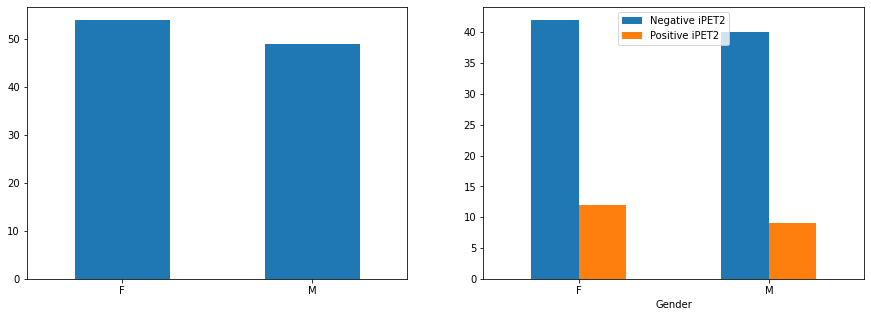

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
bar1 = data["gender"].value_counts().plot.bar(ax=ax1)
bar1.set_xticklabels(["F", "M"], rotation=0)

bar2 = pd.crosstab(data["gender"], data["ipet2"]).plot.bar(ax=ax2)
bar2.legend(["Negative iPET2", "Positive iPET2"], loc="upper center")
bar2.set_xticklabels(["F", "M"], rotation=0)
bar2.set_xlabel("Gender")

plt.show()

In [5]:
print(data["gender"].value_counts())

0    54
1    49
Name: gender, dtype: int64


# Age

In [6]:
data["age"].describe()

count    103.000000
mean      39.961165
std       15.767876
min       15.000000
25%       26.500000
50%       38.000000
75%       51.500000
max       75.000000
Name: age, dtype: float64

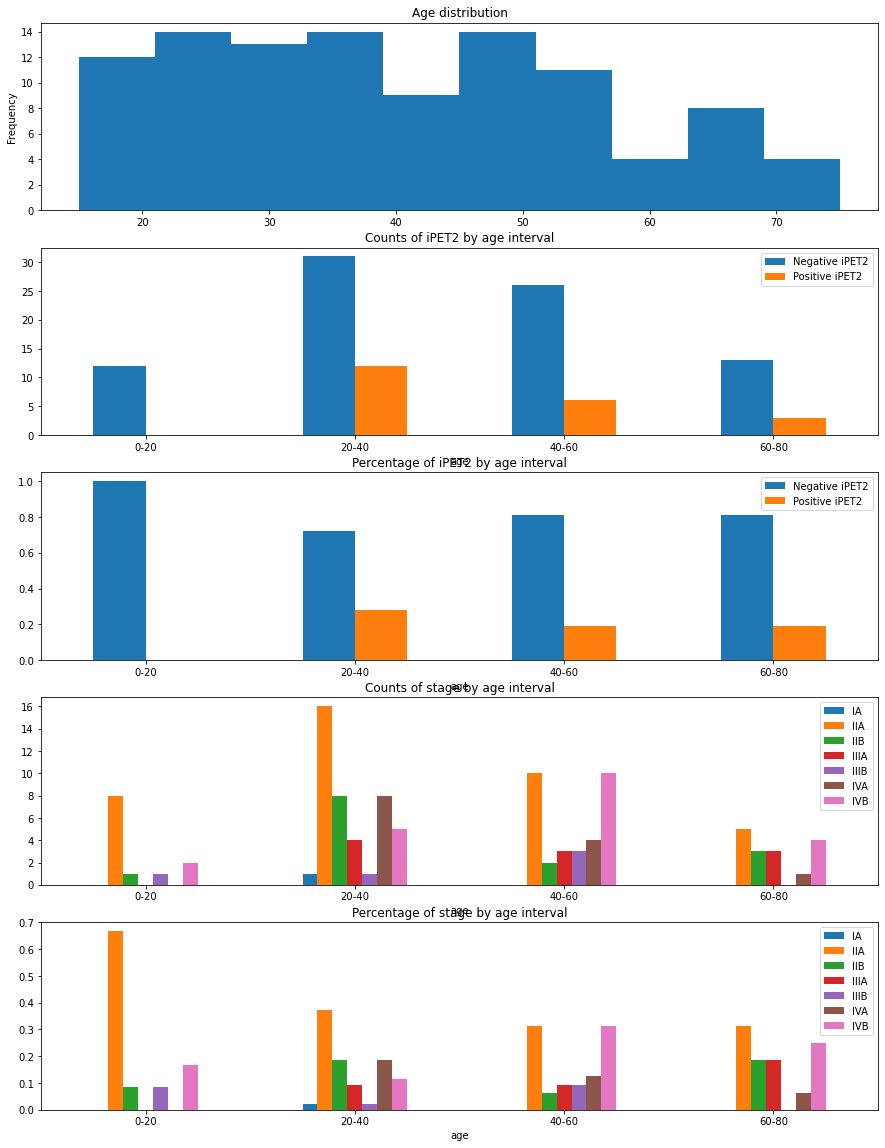

In [7]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15,20))
bar1 = data["age"].plot.hist(bins=10, ax=ax1)
bar1.set_title("Age distribution")

serie = pd.cut(data["age"], [0, 20, 40, 60, 80], labels=['0-20', '20-40', '40-60', '60-80'])

bar2 = pd.crosstab(serie, data["ipet2"]).plot.bar(ax=ax2)
bar2.legend(["Negative iPET2", "Positive iPET2"], loc="upper right")
bar2.set_xticklabels(['0-20', '20-40', '40-60', '60-80'], rotation=0)
bar2.set_title("Counts of iPET2 by age interval")

bar3 = pd.crosstab(serie, data["ipet2"], normalize="index").plot.bar(ax=ax3)
bar3.legend(["Negative iPET2", "Positive iPET2"], loc="upper right")
bar3.set_xticklabels(['0-20', '20-40', '40-60', '60-80'], rotation=0)
bar3.set_title("Percentage of iPET2 by age interval")

bar4 = pd.crosstab(serie, data["stage"]).plot.bar(ax=ax4)
bar4.legend(["IA", "IIA", "IIB", "IIIA", "IIIB", "IVA", "IVB"], loc="upper right")
bar4.set_xticklabels(['0-20', '20-40', '40-60', '60-80'], rotation=0)
bar4.set_title("Counts of stage by age interval")

bar5 = pd.crosstab(serie, data["stage"], normalize="index").plot.bar(ax=ax5)
bar5.legend(["IA", "IIA", "IIB", "IIIA", "IIIB", "IVA", "IVB"], loc="upper right")
bar5.set_xticklabels(['0-20', '20-40', '40-60', '60-80'], rotation=0)
bar5.set_title("Percentage of stage by age interval")

plt.show()

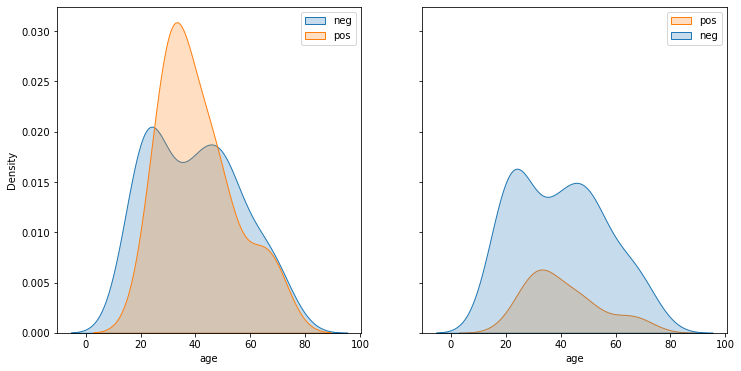

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes = axes.flatten()

age_pos = data[ data["ipet2"] == 1 ]["age"]
age_neg =  data[ data["ipet2"] == 0 ]["age"]

sns.kdeplot(age_neg, ax=axes[0], fill=True)
sns.kdeplot(age_pos, ax=axes[0], fill=True)
axes[0].legend(("neg", "pos"), loc="best")

#sns.displot(data, x="age", kind="kde",fill=True, hue=target, ax=axes[1])
sns.kdeplot(data=data, x="age",fill=True, hue=target, ax=axes[1])
axes[1].legend(("pos", "neg"), loc="best")

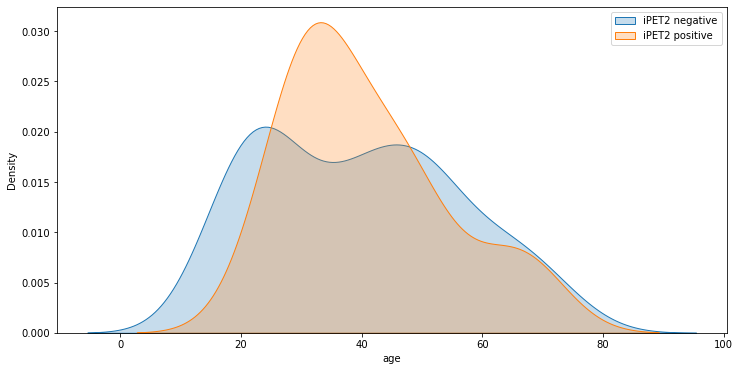

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6), sharey=True)

age_pos = data[ data["ipet2"] == 1 ]["age"]
age_neg =  data[ data["ipet2"] == 0 ]["age"]

sns.kdeplot(age_neg, ax=axes, fill=True)
sns.kdeplot(age_pos, ax=axes, fill=True)
axes.legend(("iPET2 negative", "iPET2 positive"), loc="best")

/home/andre/anaconda3/envs/tese/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


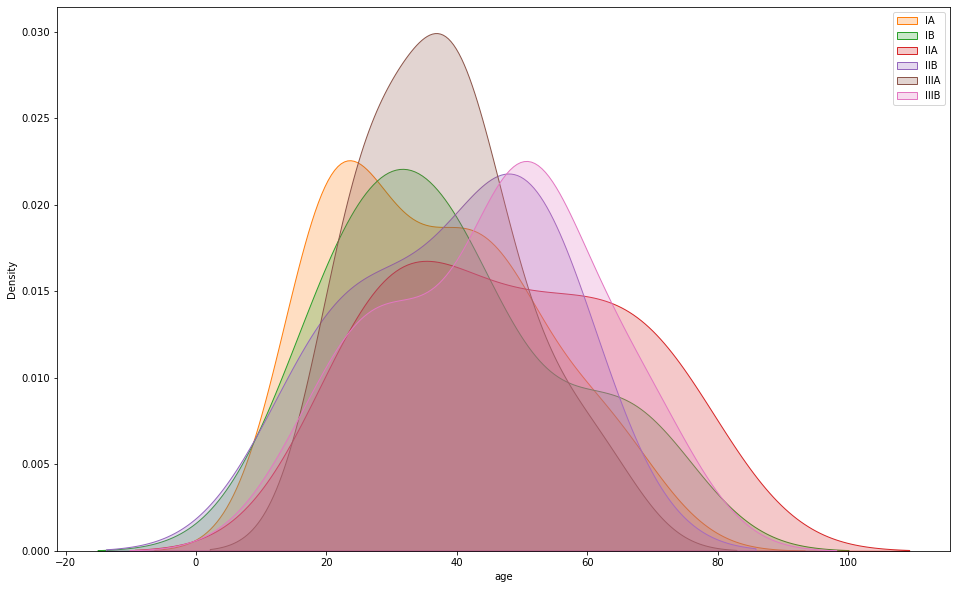

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10), sharey=True)
#axes = axes.flatten()

IA= data[ data["stage"] == "I A" ]["age"]
IB= data[ data["stage"] == "I B" ]["age"]
IIA= data[ data["stage"] == "II A" ]["age"]
IIB= data[ data["stage"] == "II B" ]["age"]
IIIA= data[ data["stage"] == "III A" ]["age"]
IIIB= data[ data["stage"] == "III B" ]["age"]
IVA= data[ data["stage"] == "IV A" ]["age"]
IVB= data[ data["stage"] == "IV B" ]["age"]

sns.kdeplot(IA, ax=ax, fill=True)
sns.kdeplot(IB, ax=ax, fill=True)
sns.kdeplot(IIA, ax=ax, fill=True)
sns.kdeplot(IIB, ax=ax, fill=True)
sns.kdeplot(IIIA, ax=ax, fill=True)
sns.kdeplot(IIIB, ax=ax, fill=True)
sns.kdeplot(IVA, ax=ax, fill=True)
sns.kdeplot(IVB, ax=ax, fill=True)

ax.legend(("IA","IB","IIA","IIB","IIIA","IIIB","IVA","IVB"), loc="best")


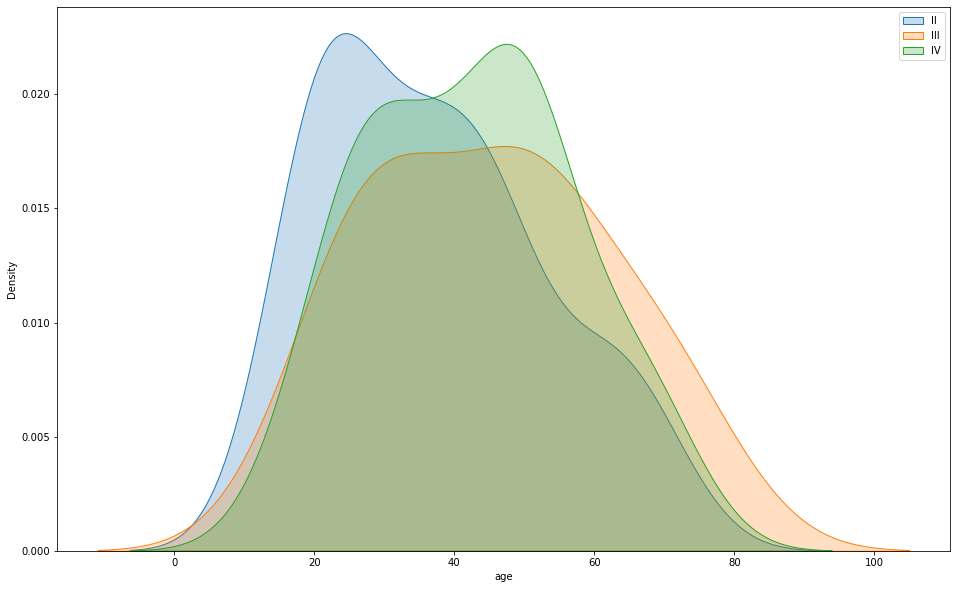

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10), sharey=True)
#axes = axes.flatten()

#I = data[ (data["stage"] == "I A") | (data["stage"] == "I B" ) ]["age"]
II = data[ (data["stage"] == "II A") | (data["stage"] == "II B") ]["age"]
III= data[ (data["stage"] == "III A") | (data["stage"] == "III B") ]["age"]
IV= data[ (data["stage"] == "IV A") | (data["stage"] == "IV B") ]["age"]

#sns.kdeplot(I, ax=ax, fill=True)
sns.kdeplot(II, ax=ax, fill=True)
sns.kdeplot(III, ax=ax, fill=True)
sns.kdeplot(IV, ax=ax, fill=True)


ax.legend(("II","III","IV"), loc="best")

#ONLY ONE PATIENT OF STAGE I
print()

<AxesSubplot:xlabel='age', ylabel='Probability'>

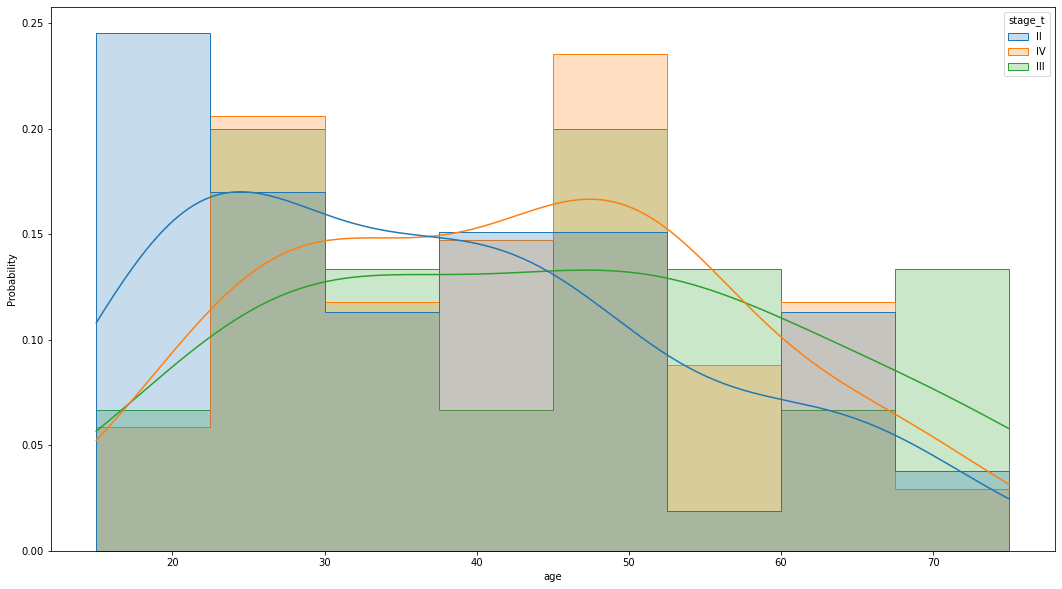

In [12]:
t = data.copy()
t["stage_t"] = t["stage"].str[:-2]
t = t[ t["stage_t"]!="I"]
fig, axes = plt.subplots(1, 1, figsize=(18, 10))

sns.histplot(data=t, x="age", hue="stage_t", element="step", stat="probability",common_norm=False, kde=True)

### Choosen

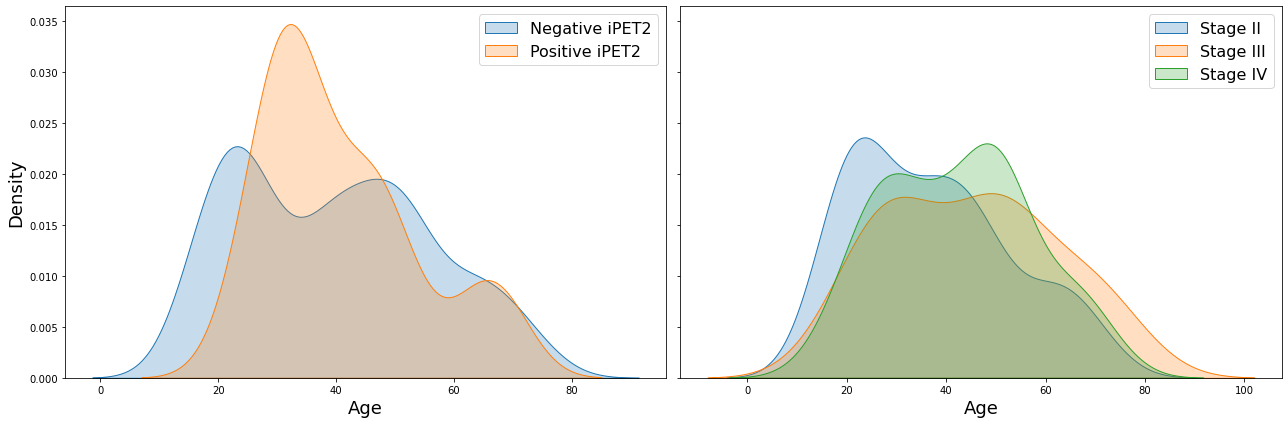

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

age_pos = data[ data["ipet2"] == 1 ]["age"]
age_neg =  data[ data["ipet2"] == 0 ]["age"]

sns.kdeplot(age_neg, ax=axes[0], fill=True, bw_adjust=0.8)
sns.kdeplot(age_pos, ax=axes[0], fill=True, bw_adjust=0.8)
axes[0].legend(("Negative iPET2", "Positive iPET2"), loc="best", fontsize=leg_size)
#axes[0].set_title("Age distribution per iPET2 result", fontsize=title_size)
axes[0].set_xlabel("Age", fontsize=axis_size)
axes[0].set_ylabel("Density", fontsize=axis_size)


#I = data[ (data["stage"] == "I A") | (data["stage"] == "I B" ) ]["age"]
II = data[ (data["stage"] == "II A") | (data["stage"] == "II B") ]["age"]
III= data[ (data["stage"] == "III A") | (data["stage"] == "III B") ]["age"]
IV= data[ (data["stage"] == "IV A") | (data["stage"] == "IV B") ]["age"]

#sns.kdeplot(I, ax=ax, fill=True)
sns.kdeplot(II, ax=axes[1], fill=True,bw_adjust=0.9)
sns.kdeplot(III, ax=axes[1], fill=True,bw_adjust=0.9)
sns.kdeplot(IV, ax=axes[1], fill=True,bw_adjust=0.9)

axes[1].legend(("Stage II","Stage III","Stage IV"), loc="best", fontsize=leg_size)
#axes[1].set_title("Age distribution per stage",fontsize=title_size)
axes[1].set_xlabel("Age", fontsize=axis_size)

plt.tight_layout()
plt.savefig("./images/age.png", dpi=100)
#ONLY ONE PATIENT OF STAGE I2

# Stage

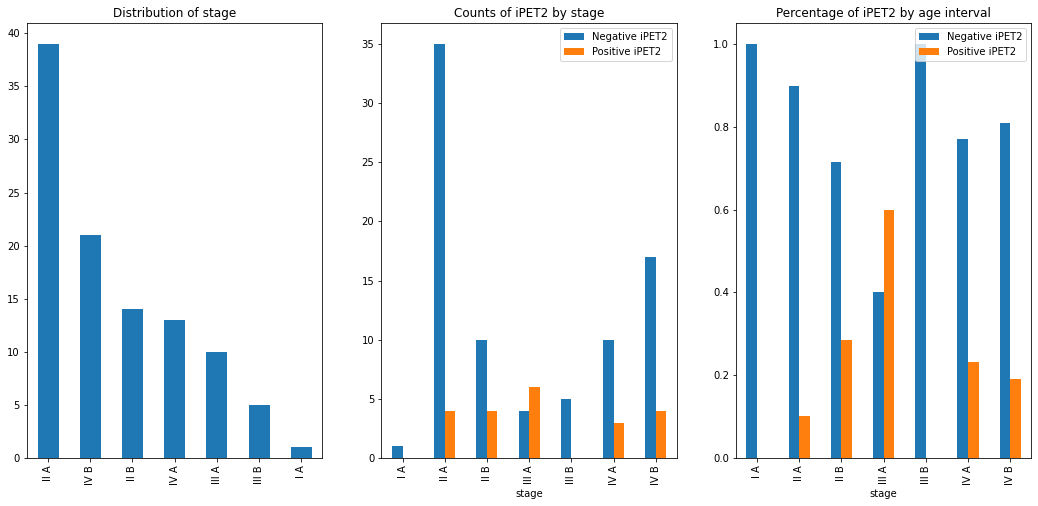

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,8))
bar1 = data["stage"].value_counts().plot.bar(ax=ax1)
bar1.set_title("Distribution of stage")

bar2 = pd.crosstab(data["stage"], data["ipet2"]).plot.bar(ax=ax2)
bar2.legend(["Negative iPET2", "Positive iPET2"], loc="best")
bar2.set_title("Counts of iPET2 by stage")

bar3 = pd.crosstab(data["stage"], data["ipet2"], normalize="index").plot.bar(ax=ax3)
bar3.legend(["Negative iPET2", "Positive iPET2"], loc="best")
bar3.set_title("Percentage of iPET2 by age interval")


plt.show()

In [15]:
print(data["stage"].value_counts(normalize=True))
print(data["stage"].value_counts())
print("*"*50)
print("Stage I has target:")
print( data[data["stage"]=="I"][target] )

II A     0.378641
IV B     0.203883
II B     0.135922
IV A     0.126214
III A    0.097087
III B    0.048544
I A      0.009709
Name: stage, dtype: float64
II A     39
IV B     21
II B     14
IV A     13
III A    10
III B     5
I A       1
Name: stage, dtype: int64
**************************************************
Stage I has target:
Series([], Name: ipet2, dtype: int64)


## Choosen

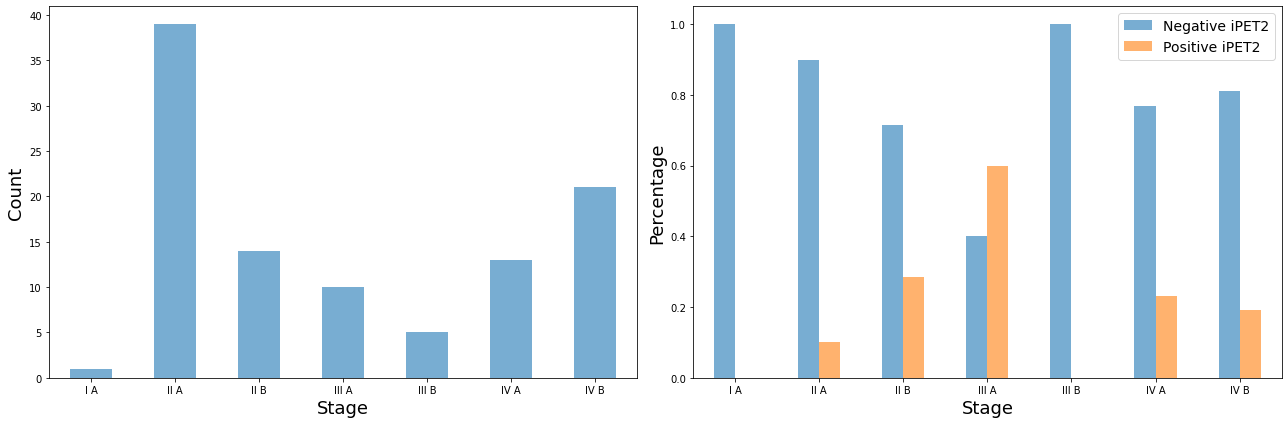

In [16]:
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(18,6))


bar1 = data["stage"].value_counts().sort_index().plot.bar(ax=ax1, alpha=alpha)
#bar1.set_title("Distribution of stage", fontsize=title_size)
bar1.set_xlabel("Stage", fontsize=axis_size)
bar1.set_ylabel("Count", fontsize=axis_size)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

bar3 = pd.crosstab(data["stage"], data["ipet2"], normalize="index").plot.bar(ax=ax3, alpha=alpha)
bar3.legend(["Negative iPET2", "Positive iPET2"], loc="best", fontsize=leg_size-2)
#bar3.set_title("Percentage of iPET2 by stage",fontsize=title_size)
bar3.set_xlabel("Stage", fontsize=axis_size)
bar3.set_ylabel("Percentage", fontsize=axis_size)

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.savefig("./images/stage.png", dpi=dpi)

plt.show()


# lmr>2.1

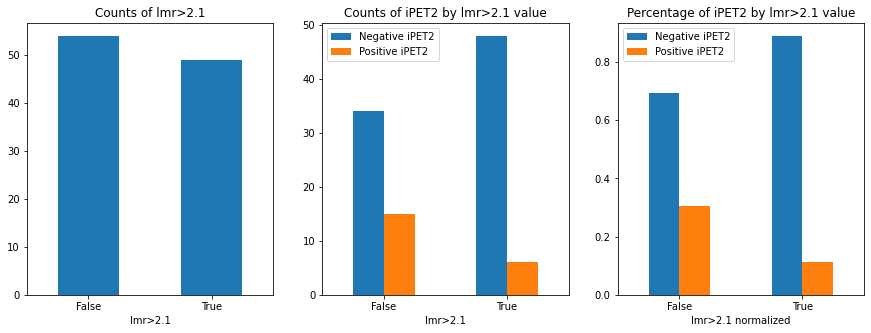

In [17]:
#fig, ax2 = plt.subplots(1, 1, figsize=(10,5))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
bar1 = data["lmr>2.1"].value_counts().plot.bar(ax=ax1)
bar1.set_xticklabels(["False", "True"], rotation=0)
bar1.set_xlabel("lmr>2.1")
bar1.set_title("Counts of lmr>2.1")

bar2 = pd.crosstab(data["lmr>2.1"], data["ipet2"]).plot.bar(ax=ax2)
bar2.legend(["Negative iPET2", "Positive iPET2"], loc="upper left")
bar2.set_xticklabels(["False", "True"], rotation=0)
bar2.set_title("Counts of iPET2 by lmr>2.1 value")

bar3 = pd.crosstab(data["lmr>2.1"], data["ipet2"], normalize="index").plot.bar(ax=ax3)
bar3.legend(["Negative iPET2", "Positive iPET2"], loc="upper left")
bar3.set_xticklabels(["False", "True"], rotation=0)
bar3.set_xlabel("lmr>2.1 normalized")
bar3.set_title("Percentage of iPET2 by lmr>2.1 value")

plt.show()

In [18]:
print(data["lmr>2.1"].value_counts(dropna=False))
print("*"*50)
print("lmr>2.1 NaN has target:")
print( data[data["lmr>2.1"].isna()][target] )

1    54
0    49
Name: lmr>2.1, dtype: int64
**************************************************
lmr>2.1 NaN has target:
Series([], Name: ipet2, dtype: int64)


### choosen

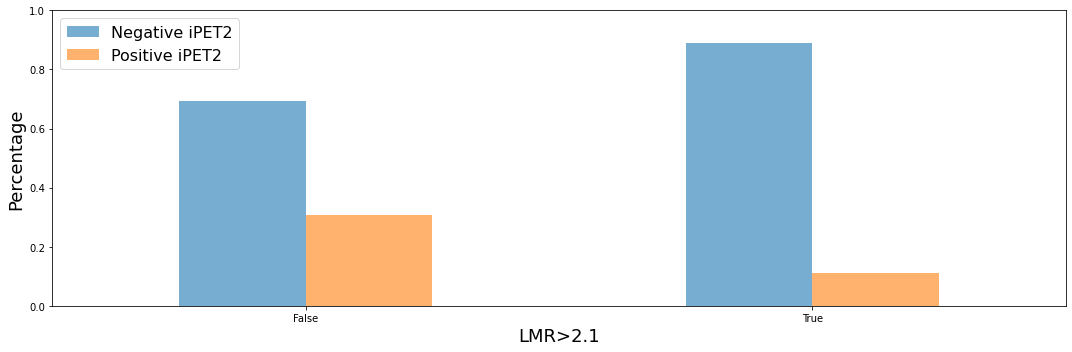

In [20]:

fig, ax3 = plt.subplots(1, 1, figsize=(15,5))

bar3 = pd.crosstab(data["lmr>2.1"], data["ipet2"], normalize="index").plot.bar(ax=ax3, alpha=alpha)
bar3.legend(["Negative iPET2", "Positive iPET2"], loc="upper left", fontsize=leg_size)
bar3.set_xticklabels(["False", "True"], rotation=0)
bar3.set_xlabel("LMR>2.1", fontsize=axis_size)
bar3.set_ylabel("Percentage", fontsize=axis_size)

#bar3.set_title("Percentage of iPET2 by lmr>2.1 value", fontsize=title_size)
bar3.set_ylim(0,1)

plt.tight_layout()
plt.savefig("./images/lmr.png", dpi=dpi)

plt.show()

## iPET2

0    82
1    21
Name: ipet2, dtype: int64


<AxesSubplot:>

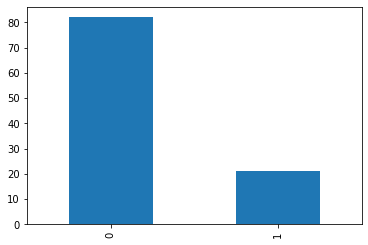

In [21]:
print(data["ipet2"].value_counts())
data["ipet2"].value_counts().plot.bar()

# Correlations

<AxesSubplot:>

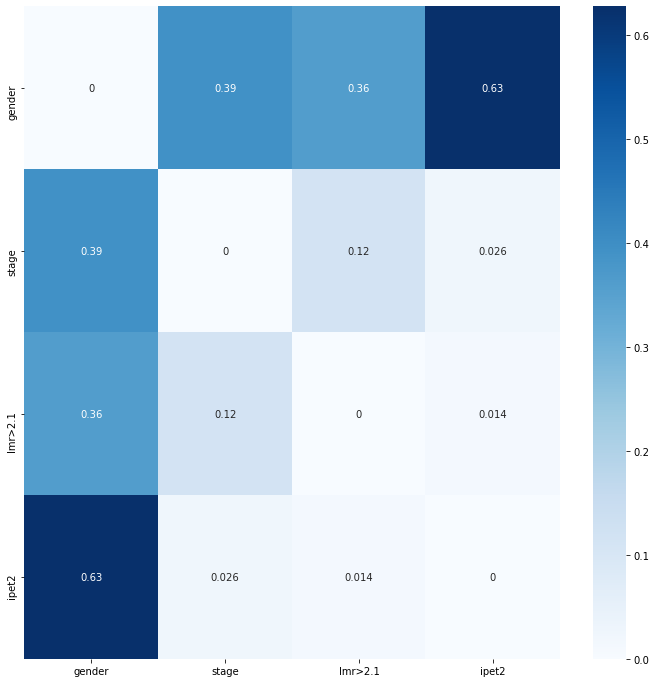

In [22]:
fig = plt.figure(figsize=[12, 12])
cat = ["gender", "stage", "lmr>2.1", "ipet2"]
corrs = []
for i in cat:
    for j in cat:
        if i == j :
            corrs.append(0)
        else:
            obs = pd.crosstab(data[i], data[j])
            chi2, p, dof, ex = chi2_contingency(obs, correction=False)
            corrs.append(p)
corrs = np.array(corrs).reshape((len(cat), len(cat)))
sns.heatmap(corrs, xticklabels=cat, yticklabels=cat, annot=True, cmap='Blues')

<AxesSubplot:>

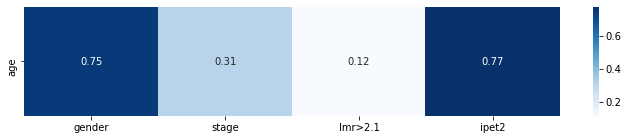

In [23]:
fig = plt.figure(figsize=[12, 2])
cat = ["gender", "stage", "lmr>2.1", "ipet2"]
corrs = []
for i in cat:
    if i != "stage":
        v0 = data[ data[i] == 0 ]["age"]
        v1 = data[ data[i] == 1 ]["age"]
        stat, p = f_oneway(v0, v1)
        corrs.append(p)
    else:
        v0 = data[ data[i] == "I A" ]["age"]
        v1 = data[ data[i] == "II A" ]["age"]
        v2 = data[ data[i] == "II B" ]["age"]
        v3 = data[ data[i] == "III A" ]["age"]
        v4 = data[ data[i] == "III B" ]["age"]
        v5 = data[ data[i] == "IV A" ]["age"]
        v6 = data[ data[i] == "IV B" ]["age"]
        stat, p = f_oneway(v0, v1, v2, v3, v4, v5, v6)
        corrs.append(p)
        
corrs = np.array(corrs).reshape((1, len(cat)))
sns.heatmap(corrs, xticklabels=cat, yticklabels=["age"], annot=True, cmap='Blues')

### chosen

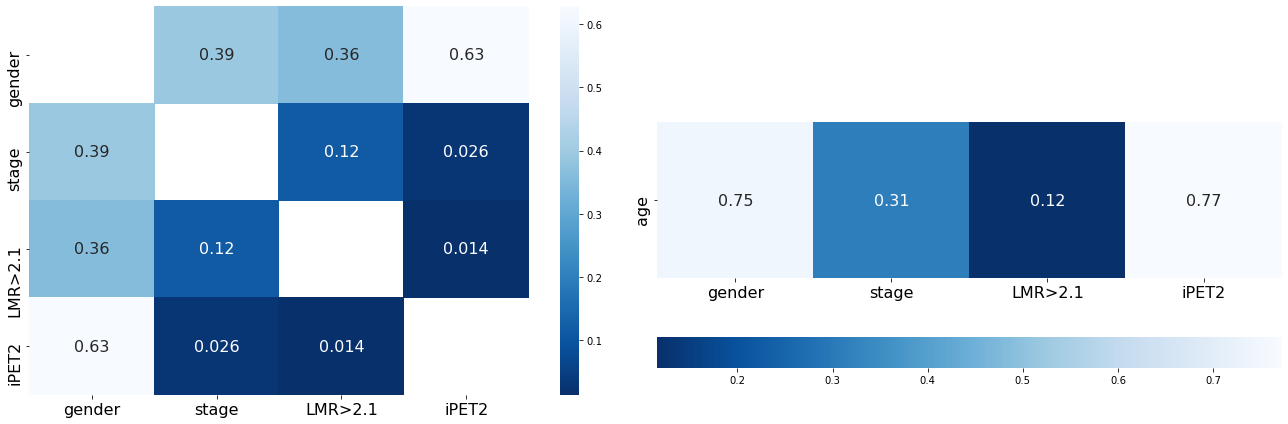

In [24]:
fig, axes = plt.subplots(1,2, figsize=[18, 6])

cat = ["gender", "stage", "lmr>2.1", "ipet2"]
names=["gender", "stage","LMR>2.1", "iPET2"]
corrs = []
for i in cat:
    for j in cat:
        if i == j :
            corrs.append(0)
        else:
            obs = pd.crosstab(data[i], data[j])
            chi2, p, dof, ex = chi2_contingency(obs, correction=False)
            corrs.append(p)
corrs = np.array(corrs).reshape((len(cat), len(cat)))
mask = corrs.copy()
for i in range(len(mask)):
    for j in range(len(mask[0])):
        v = False
        if i==j: v = True
        mask[i,j] = v
res = sns.heatmap(corrs, xticklabels=cat, yticklabels=cat, annot=True, cmap='Blues_r',mask=mask, ax=axes[0],
            annot_kws={"size": 16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = axis_size-2)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = axis_size-2)

res.set_xticklabels(names)
res.set_yticklabels(names)

####################################################33

cat = ["gender", "stage", "lmr>2.1", "ipet2"]
corrs = []
for i in cat:
    if i != "stage":
        v0 = data[ data[i] == 0 ]["age"]
        v1 = data[ data[i] == 1 ]["age"]
        stat, p = f_oneway(v0, v1)
        corrs.append(p)
    else:
        v0 = data[ data[i] == "I A" ]["age"]
        v1 = data[ data[i] == "II A" ]["age"]
        v2 = data[ data[i] == "II B" ]["age"]
        v3 = data[ data[i] == "III A" ]["age"]
        v4 = data[ data[i] == "III B" ]["age"]
        v5 = data[ data[i] == "IV A" ]["age"]
        v6 = data[ data[i] == "IV B" ]["age"]
        stat, p = f_oneway(v0, v1, v2, v3, v4, v5, v6)
        corrs.append(p)
        
corrs = np.array(corrs).reshape((1, len(cat)))
res = sns.heatmap(corrs, xticklabels=cat, yticklabels=["age"], annot=True, cmap='Blues_r', square=True,
            cbar_kws={"orientation": "horizontal"},annot_kws={"size": 16},ax = axes[1])
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = axis_size-2)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = axis_size-2)
res.set_xticklabels(names)


plt.tight_layout()
plt.savefig("./images/corrs.png", dpi=dpi)
plt.show()